# Introduction

## Group members

The group is composed by three second year Management and Computer Science students: Maria Chiara Lischi, Gabriele Pacielli, Matteo Spadaccia.

## The graph

In order to challenge our knowledge, we decided to choose the graph related to political blogs, which is directed and unweighted. The graph is huge, containing 1224 nodes liked to each other by 19025 edges.

The graph we decided to analyze is a directed network of hyperlinks among a large set of U.S. political weblogs from before the 2004 election. It includes blog political affiliation as metadata, where each node represents a political blog and each link represents a reference from one blog to another. 

During our researches on the nature of the graph, we discovered that it was the object of an interesting paper in which it is analyzed deeply by Lada A. Adamic and Natalie Glance, "The political blogosphere and the 2004 US Election", in Proceedings of the WWW-2005 Workshop on the Weblogging Ecosystem, 2005 (<https://edisciplinas.usp.br/pluginfile.php/3333574/mod_resource/content/2/p36-adamic.pdf>).

We also discovered that the data we had are a portion of the original one available online, which is reperible here <https://networks.skewed.de/net/polblogs>. This more complete dataset (which is located in the folder "Original graph") contains information about a total of 1490 nodes. The additional information we gathered contains the URL of the blog to which each node is related, and a lablel for the political orientation of each node (0 for left or liberal, and 1 for right or conservative). We used this additional information for enhance our analysis.

In our work, we focused on the nodes which have an in-degree or out-degree of at least one (excluding the singletons). The graph we worked on is therefore characterized by 1224 nodes, liked to each other by 19025 edges. The source from wich the dataset is reachable is the following: <http://konect.cc/networks/dimacs10-polblogs/>.

Below a representation of the Network, which was coloured following the political orientation of the nodes (blue for left or liberal and red for right or conservative), which was obtained by implementing the graph in Gephi and applying the "force Atlas 2" algorithm for the visualization. We can see that the graph is polarized according to the political orientation of nodes. 

<img src="graph visualization.png" alt="graph visualization" />

We will now get in deep with the analysis of the graph, for which we will need some libraries imported below.

## Import packages
[coding section N°1]

In [1]:
import random #random generator
import networkx as nx #network 
import matplotlib.pyplot as plt #drawing
import numpy as np #matrices
import csv #reading excel files
import pandas as pd
import time
import networkx.algorithms.community as nxc
import networkx.algorithms.community.quality as q
from tqdm.notebook import tqdm
from sklearn.metrics.cluster import normalized_mutual_info_score

# Week 1: Networks

## Code explanation
[coding sections N°2,3,4]

In order to implement our graph on Phyton:
- we iterated over the csv file containing the complete (but raw) list of edges present in the graph to consider the mentioned nodes and edges on NetworkX;
- we assumed that the not mentioned nodes are not present in the graph, not even as completelly disconnected ones.

The subgraph we decided to implement is the one composed by the node with the highest in degree and all its in-neighbors, therefore:
- we discovered the most in-connected node by iterating over the edge list of the graph;
- we computed the aforementioned subgraph considering firstly all the nodes included and then all the edges between them.

Finally:
- we reported the number of nodes and the actual number of edges (without repetitions);
- we simply calculated the average degree and the density of our graph using the formulas seen during the lectures.

## Implementing the choosen social network
[coding section N°2]

In [2]:
# IMPLEMENTING THE GRAPH ON NETWORKX

print("Computing the graph:", end=' ')

with open("Political_blogs/Political_blogs_edge.txt", "r") as f:
    
    row = f.readline().strip() #eliminating useless first line
    
    # Variables initialization
    G = nx.DiGraph() #creating an empty directed graph
    row = f.readline().strip() #reading the first effective line
    
    flag = 0 # tis is to check whether there is a repetition of some edges
    
    while row != "]": #stops with the ending characer of the file
        a, b = row.split(' ')
        a = int(a)
        b = int(b)
        if (a,b) not in G.edges():
            G.add_edge(a,b)
        else:
            flag = 1
        row = f.readline().strip() #to go to the following row

print("Done!")
if flag == 1:
    print("Some of the edges in the list of edges were repeated")

Computing the graph: Done!
Some of the edges in the list of edges were repeated


## Computing and drawing a choosen subgraph of the graph
[coding section N°3]

Preparing to draw the subgraph composed by the node with highest in-degree and its in-neighbors:
Searching for the node with the highest in-degree: Done!
The node 155 is the one with the highest in-degree (337 in-edges)
Computing the choosen subgraph: Done!
Drawing the subgraph:


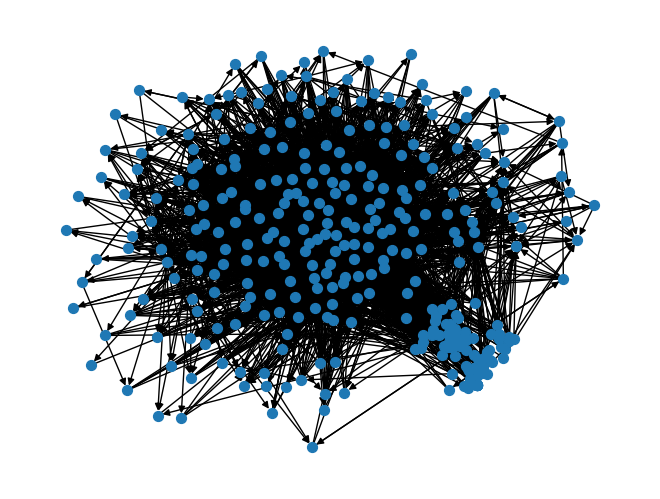

In [3]:
# COMPUTING THE SUBGRAPH CONTAINING THE NODE WITH THE HIGHEST OUT-DEGREE
# AND ALL THE NODES REACHABLE FROM IT WITH PATHS OF LENGTH ONE

print("Preparing to draw the subgraph composed by the node with highest in-degree and its in-neighbors:")

# Searching for the node with the highest out-degree:
print("Searching for the node with the highest in-degree:", end=' ')

# Variables initialization
kout = {n:G.out_degree(n) for n in G.nodes()} #dictionary with all the out degrees
kin = {n:G.in_degree(n) for n in G.nodes()} #dictionary with all the in degrees

# Searching the most in-connected node
kmax = max(kin.values()) #highest out-degree value
kmaxs = [n for n in kin if kin[n] == kmax] #list of nodes where the highest in-degree value is reached
nmax = kmaxs[0] #first node where the highest in-degree value is reached
repetition = len(kmaxs) #to understand if there is more than one node with the highest in-degree

print("Done!")
if repetition == 1:
    print("The node ", nmax, " is the one with the highest in-degree (", kmax, " in-edges)", sep='')
else:
    print("The node ", nmax, " is one of the ", repetition," with the highest in-degree (", kmax, " in-edges)", sep='')
    
# Computing the choosen subgraph:
print("Computing the choosen subgraph:", end=' ')

# Variables initialization
S = nx.DiGraph() #creating an empty directed graph
S.add_node(nmax) #adding the 'central' node

# Adding the out neighbors of the 'central' node
for u,v in G.edges():
    if v == nmax:
        S.add_node(u)
        S.add_edge(u,nmax)

# Adding the remaining edges
for u,v in G.edges():
    if (u in S.nodes()) and (v in S.nodes()):
        S.add_edge(u,v)

print("Done!")


# DRAWING THE SUBGRAPH
print("Drawing the subgraph:")
nx.draw_kamada_kawai(S, node_size=50)

## Returning the number of nodes and edges, computing average degree and density of the graph
[coding section N°4]

In [4]:
#Returning the number of nodes
print("The number of nodes of the graph is:", end=" ")
N = len(G.nodes()) #actual number of nodes
print(N)

#Returning the number of edges
print("The number of edges of the graph is:", end=" ")
E = len(G.edges()) #actual number of edges
print(E)

#Computing the avarage degree:
print("The avarage degree of the graph is:", end=" ")
avg_degree = E/N
print(avg_degree)

#Computing the density:
print("The density of the graph is:", end=" ")
density = E/(N*(N-1))
print(density)    

The number of nodes of the graph is: 1224
The number of edges of the graph is: 19025
The avarage degree of the graph is: 15.543300653594772
The density of the graph is: 0.012709158343086484


## Analysis

The graph is direct, unweighted and huge. It contains 1224 nodes liked by 19025 edges. Despite the nodes are labeled until node 1490, only 1224 of them are actually mentioned in the edge list and therefore considered by our analysis (the others are singletons). Other characteristics that are worth mentioning are its average degree of about 15.5 links for each node, and its very low density, of about 0.0127, which indicates that the graph is sparse.

We decided to implement a subgraph that considered the most referenced blog and all the 337 blogs that referenced it. Since the most referenced blog correspond to the node with the highest in degree, which is node 155, we looked for the corresponding URL: <https://www.dailykos.com>, which is an important liberal forum.

# Week 2: Small World

## Code explanation
[coding sections N°5,6]

We calculated the distance statistics of our graph by:
- iterating over all the possible pairs of nodes in the graph;
- calculating the shortest path length between them using the related NetworkX function (for computational reasons, we considered the distance to be 0 if the two nodes did not have a strong connection);
- updating the diameter value to the highest path length found at each iteration;
- computing the average path length and the inverse average path length from the results.

An alternative way to compute these statistics would have been to use the adjacency matrix and its powers, avoiding the NetworkX function for the shortest path computation. We implemented this method below, in week 7, for the Katz Index computation.

## Returning average distance and diameter
[coding section N°5]

In [5]:
# COMPUTING THE AVERAGE DISTANCE, THE AVERAGE INVERSE DISTANCE AND THE DIAMETER

print("Computing average distance, average inverse distance, diameter:", end=' ')

# Initializing variables
diameter = 0 #will become the diameter of the graph
distance_sum = 0 #the sum of all the distances among nodes of the graph
disconnected = 0 #to understand whereas the graph is connected
inv_distance_sum = 0 #the inverse sum of all the distances among nodes of the graph
loading = 0 #inizialitaion of the loading bar variable

# Computing the sum of the distances, the sum of their inverse and obtaining the diameter
for u in G.nodes():
    for v in G.nodes():
        if u != v:
            try:
                distance_u_v = nx.shortest_path_length(G, u, v)
                inv_distance_sum += 1/distance_u_v
            except:
                distance_u_v = 0
                disconnected += 1
            distance_sum += distance_u_v
            if diameter < distance_u_v:
                diameter = distance_u_v
            
    # Loading bar  
    loading += 1
    if loading >= N/10:
        loading = 0
        print("___", end="")

# Computing the average distance
avg_distance = distance_sum/(N*(N-1))

# Computing the average inverse distance
inv_avg_distance = (N*(N-1))/inv_distance_sum

print(" Done!")


# RETURNING THE AVERAGE DISTANCE AND THE DIAMETER

if disconnected == 0:
    print("The graph is strongly connected!")
else:
    print("The graph is not strongly connected, but not considering when the nodes are not connected:")
print("The average distance is:", avg_distance)
print("The diameter is:", diameter)

Computing average distance, average inverse distance, diameter: ___________________________ Done!
The graph is not strongly connected, but not considering when the nodes are not connected:
The average distance is: 2.2222562914508948
The diameter is: 9


## Returning the average inverse distance
[coding section N°6]

In [6]:
# RETURNING THE AVERAGE INVERSE DISTANCE (computed in coding section N°5)

print("The average inverse distance is:", inv_avg_distance)

The average inverse distance is: 4.559825637239215


## Analysis

We can observe that the average distance in our graph (approximately 2.2) is quite small, as the diameter (= 9). Although, the graph is not strongly connected, so the most representative value is the average inverse distance (approximately 4.6).

# Week 3: Hubs

## Code explanation
[coding sections N°7,8,9]

We decided to compute the decay centrality as measure of centrality for our graph: it is indicated for directed graphs and giving a centrality measure based on the proximity between a choosen vertex and every other vertex weighted by the decay. Therefore:
- we iterated over all the possible pairs of nodes in the graph;
- we calculated the shortest path length between them using the related NetworkX function (for computational reasons, we considered the delta^distance to be 0 if the two nodes did not have a strong connection);
- we summed up the total centrality value for each node.

## Computing the decay centrality of each node
[coding section N°7]

In [7]:
# COMPUTING THE DECAY CENTRALITY OF EACH NODE

delta = 0.25 #value of delta for the decay centrality computation

print("Computing decay centrality of each node with coefficient ", delta, ":", sep='', end=' ')

# Variables initialization
C = [] #creating an empty list that will be filled with the ordered decay centrality values
loading = 0 #inizialitaion of the loading bar variable
cmax = -1 #will be updated to the highest out-degree value
ncmax = -1 #will be updated to the node with the highest out-degree

# Computing th decay centrality of each node
for u in G.nodes():
    c = 0
    for v in G.nodes():
        if u != v:
            try:
                c += delta**nx.shortest_path_length(G, u, v)
            except:
                pass
    C.append(c)
    if c > cmax:
        cmax = c
        ncmax = u
        
    # Loading bar
    loading += 1
    if loading >= N/10:
        loading = 0
        print("___", end="")

print(" Done!")

Computing decay centrality of each node with coefficient 0.25: ___________________________ Done!


## Returning the most central node
[coding section N°8]

In [8]:
# RETRURNING THE MOST CENTRAL NODE (computed in coding section N°7)

print("The most central node is", ncmax, "with a decay centrality of", cmax)

The most central node is 855 with a decay centrality of 86.969970703125


## Drawing the cumulative distribution of the decay centrality
[coding section N°9]

Computing the cumulative distribution of the decay centrality:


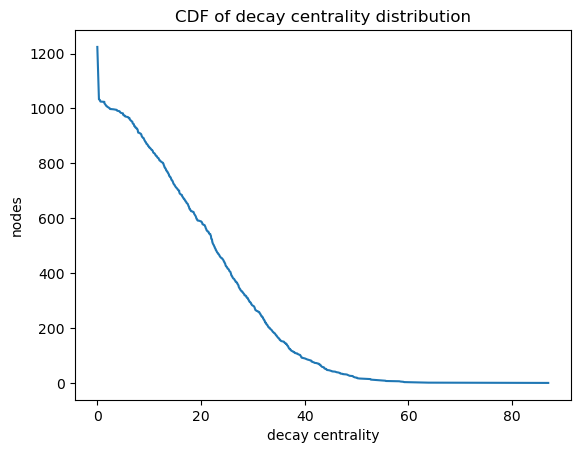

In [9]:
# COMPUTING AND DRAWING THE CUMULATIVE DISTRIBUTION OF THE DECAY CENTRALITY

print("Computing the cumulative distribution of the decay centrality:")

%matplotlib inline

cdf_x = [] # list of x-axis
cdf_y = [] # list of y-axis
data_centralities_copy = C.copy()
N_temp = N # N_temp will represent the remaining number of nodes above the current x
while data_centralities_copy:
    current_min = min(data_centralities_copy) # gives the current x-axis value
    current_num = data_centralities_copy.count(current_min) # gives how many nodes will disappear when goin through the current x-axis value
    cdf_x.append(current_min) #
    cdf_y.append(N_temp) #
    N_temp = N_temp - current_num 
    for n in range(current_num): 
        data_centralities_copy.remove(current_min) 

# Plotting
plt.xlabel('decay centrality') 
plt.ylabel('nodes')
plt.title('CDF of decay centrality distribution')
plt.plot(cdf_x,cdf_y)

## Analysis

We found out that the node with the highest deacy centrality was the same one we focused on before when calculating the subgraph. We calculated the distribution by sorting our array and using matplotlib for plotting it.

# Week 5: PageRank

## Code explanation
[coding sections N°10,11,12,13,14]

Using the approach seen during the lessons, we realized that during the various iterations the nodes that do not have outgoing links accumulated the PageRank with the passing of the iterations, and the cumulative function distribution did not arrive at one. We found a solution that took in consideration those nodes allowing to redistribute the PageRank in the graph; the formula we used is the following:

$Rank(v)_{t} = { {\alpha \over N} + {(1 - \alpha)} * ( \sum_{u_{i}}{Rank(u_{i})_{t-1} \over OutDegree(u_{i})} + \sum_{u_{j}}{Rank(u_{j})_{t-1} \over N})}$

Where:
- $v$ is the node for which we are computing the PageRank
- $u_i$ is each node that links to node v
- $u_j$ is each node that has out-degree = 0
- $n$ is the number of nodes
- $\alpha$ is the teleportation factor
- $t$ is the current iteration

Implementing the same number of iterations in NetworkX PageRank function and in ours, we obtained the same values (with an error of $1.5 * 10^{-17}$) and the same Rank as NetworkX built-in function. 

## Writing a function to compute the PageRank of the nodes in a graph 
[coding section N°10]

In [10]:
# COMPUTING THE PAGERANK OF THE NODES OF THE GRAPH G:
# a = alpha coefficient
# e = maximum difference beetween an iteration's ranking and its precendent's one to approve convergence
# mi = maximum number of iterations to be done

def page_ranking(G, a, e=0, mi=200):

    print("Computing the PageRank of the given graph with alpha coefficient ", a, ":", sep='', end=' ')
    
    # Variables initialization
    N = len(G.nodes()) #number of nodes
    R = {n:1/N for n in G.nodes()} #current iteration's rankings
    Rprec = {n:0 for n in G.nodes()} #previous iteration's rankings
    nostop = True #flag for stopping when the convergence is reached
    iterations = 0 #current iteration's number
    kout = {n:G.out_degree(n) for n in G.nodes()} #dictionary with all the out degrees
    L = [] #list that will contain all the nodes with no out-connection
    sum_PageRanks = [] #list that will contain the sum of the PageRank scores at each iteration
    
    # Filling the list of all the nodes with no out-connection
    for n in G.nodes():
        if kout[n] == 0:
            L.append(n)
    L = [n for n in G.nodes() if kout[n]==0]
    # Iterating PageRank
    while nostop and (iterations < mi):
        
        iterations += 1
        
        Rprec = R.copy()
        
        # Second sum's value calculation
        sigma2 = 0
        for n in L:
            sigma2 += Rprec[n]
        sigma2 = sigma2/N
        
        # First sum's value calculation for each node
        sigma = {n:0 for n in G.nodes()}
        for u,v in G.edges():
            sigma[v] += Rprec[u]/kout[u]
            
        # Ranking calculation for each node
        for n in G.nodes():
            R[n] = (a/N) + ((1-a)*(sigma[n]+sigma2))
        
        # Verifying that the sum of the PageRank scores at each iteration is equal to 1
        sum_PageRanks.append(sum(R.values()))
        
        # Convergence verification
        nostop = False
        for n in G.nodes():
            if not(-e < Rprec[n]-R[n] < e):
                nostop = True
                break
    
    print("Done!")
    
    # Verifying that the sum of the PageRank scores at each iteration is equal to 1
    verify = True
    for i in sum_PageRanks:
        if not 0.999999999999 < i < 1.000000000001:
            verify = False
            break
    if verify:
        print("The sum the PageRank scores at each iteration is equal to 1")
    else:
        print("you failed")

    return (R, iterations)

## Computing the nodes' PageRank and comparing it with NetworkX's scores
[coding section N°11]

In [11]:
# COMPUTING THE NODES' PAGERANK AND COMPARING IT WITH THE NETWORKX'S SCORES

alpha = 0.15 #alpha coefficient to use

# Computing the nodes' PageRank with the built-in NetworkX's function and the number of iterations needed
nostop = True
max_iterations = 0
while nostop:
    nostop = False
    try:
        RNX = nx.pagerank(G, alpha = (1-alpha), max_iter = max_iterations+1)
    except:
        nostop = True
    max_iterations += 1
    
# Computing the nodes' PageRank with our function
R, iterations = page_ranking(G, alpha, mi = max_iterations)

# Comparing results with relative error
max_error = 0
for n in G.nodes:
    error = abs(R[n]-RNX[n]) / RNX[n]
    if error > max_error:
        max_error = error

# Keeping a verified copy of the rankings
RV = R.copy()
RNXV = RNX.copy()

# Comparing the two PageRank results for error detection
mistake = False
for n in range (N):
    if max(R, key = R.get) != max(RNX, key = RNX.get):
        mistake = True
    del R[max(R, key = R.get)]
    del RNX[max(RNX, key = RNX.get)]
    
# Returning the comparison's results
print("Using an alpha coefficient of ", alpha, ", our function succeded in computing the PageRank scores in ", iterations, " iterations, with a maximum error of about ", round(max_error,2)*100, "% with respect to the NetworkX-function-calculated values.", sep='')
if mistake == False:
    print("No mistake was made with respect to the nodes ranking!")

Computing the PageRank of the given graph with alpha coefficient 0.15: Done!
The sum the PageRank scores at each iteration is equal to 1
Using an alpha coefficient of 0.15, our function succeded in computing the PageRank scores in 10 iterations, with a maximum error of about 0.0% with respect to the NetworkX-function-calculated values.
No mistake was made with respect to the nodes ranking!


## Returning the node with the highest PageRank value
[coding section N°12]

In [12]:
# RETURNING THE NODE WITH THE HIGHEST PAGERANK VALUE

Rmax = max(RV.values())
nRmax = max(RV, key = RV.get)
print("The node with the highest PageRank value (", Rmax, ") is: ", nRmax, sep='')

The node with the highest PageRank value (0.01884460817586186) is: 155


## Computing and drawing the PageRank cumulative distribution
[coding section N°13]

Computing the cumulative distribution of the rankings:


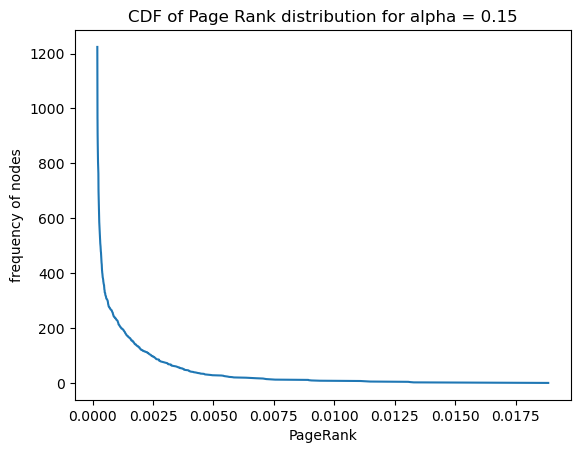

In [13]:
# COMPUTING AND DRAWING THE PAGERANK CUMULATIVE DISTRIBUTION

print("Computing the cumulative distribution of the rankings:")

RVL = list(RV.values())

%matplotlib inline

cdf_x = [] # list of x-axis
cdf_y = [] # list of y-axis
RVL_copy = RVL.copy()
N_temp = N # N_temp will represent the remaining number of nodes above the current x
while RVL_copy:
    current_min = min(RVL_copy) # gives the current x-axis value
    current_num = RVL_copy.count(current_min) # gives how many nodes will disappear when goin through the current x-axis value
    cdf_x.append(current_min) #
    cdf_y.append(N_temp) #
    N_temp = N_temp - current_num 
    for n in range(current_num): 
        RVL_copy.remove(current_min) 

# Plotting
plt.xlabel('PageRank')
plt.ylabel('frequency of nodes')
plt.title('CDF of Page Rank distribution for alpha = 0.15')
plt.plot(cdf_x,cdf_y)

## Re-running the PageRank function using another alpha coefficient
[coding section N°14]

Computing the PageRank of the given graph with alpha coefficient 0.5: Done!
The sum the PageRank scores at each iteration is equal to 1
This time, 5 iterations were necessary
Computing the cumulative distribution of the second rankings:


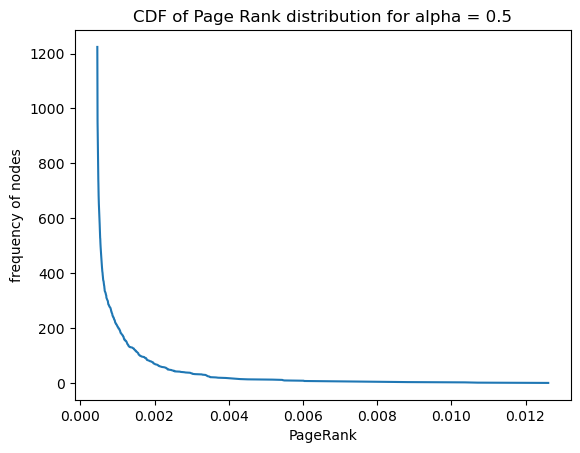

In [14]:
# COMPUTING THE NODES' PAGERANK WITH ANOTHER ALPHA COEFFICIENT

alpha = 0.5 #alpha coefficient to use

# Computing the nodes' PageRank with the built-in NetworkX's function
nostop = True
max_iterations = 0
while nostop:
    nostop = False
    try:
        RNXV2 = nx.pagerank(G, alpha=(1-alpha), max_iter=max_iterations+1)
    except:
        nostop = True
    max_iterations += 1
    
# Computing the nodes' PageRank with our function
RV2, iterations2 = page_ranking(G, alpha, mi = max_iterations)

print("This time,", iterations2, "iterations were necessary")


# COMPUTING AND DRAWING THE SECOND PAGERANK CUMULATIVE DISTRIBUTION

print("Computing the cumulative distribution of the second rankings:")

RVL2 = list(RV2.values())

%matplotlib inline

cdf_x = [] # list of x-axis
cdf_y = [] # list of y-axis
RVL2_copy = RVL2.copy()
N_temp = N # N_temp will represent the remaining number of nodes above the current x
while RVL2_copy:
    current_min = min(RVL2_copy) # gives the current x-axis value
    current_num = RVL2_copy.count(current_min) # gives how many nodes will disappear when goin through the current x-axis value
    cdf_x.append(current_min) #
    cdf_y.append(N_temp) #
    N_temp = N_temp - current_num 
    for n in range(current_num): 
        RVL2_copy.remove(current_min) 

# Plotting
plt.xlabel('PageRank')
plt.ylabel('frequency of nodes')
plt.title('CDF of Page Rank distribution for alpha = 0.5')
plt.plot(cdf_x,cdf_y)

## Analysis

The node which showed the highest PageRank is the node 155, which is different from the node 855, which was the node with the higher decay centrality. This difference is due to the fact that PageRank algotithm gives more importance with the nodes which presents a higher in-degree. The two Cumulative Distribution Functions appears in fact to be different: PageRank's CDF appears to be more squeezed, while Decay Centrality CDF is more skewed. 

We tested our PageRank function twice, with different alpha coefficient. While the number of iteration changed significantly (it has halved), the two CDF appear to be very similar.

## Week 6: Communities

## Code explanation
[coding sections N°15,16,17,18,19,20]

For the analysis of the communities we had to reduce the graph to a smaller component, obtained by extracting the largest connected component of the graph and subsequently working on the core of it for computational reasons.

We implemented each of the requested community detection techniques and computed the computational time, the modularity, the number of detected clusters, the cluster size distribution and the partition quality for each of them. Afterwards, we compared the three different algorithms (in pairs) with the Normalized Mutual Information. 

Finally, we provided a visualization of the detected clusters of the studied subgraph basing on the algorithm we considered more approppriate (see the analysis below for futher explanation of why): the Girvan-Newman algorithm (bridge removal technique). 

## Transforming the graph as undirected and extracting the core of its largest connected component
[coding section N°15]

In [15]:
U = G.to_undirected() # transforming the graph into an undirected and unweighted graph
U.remove_edges_from(nx.selfloop_edges(U)) #removing self loops
LCCNodes =  list(max(nx.connected_components(U), key=len)) #considering the largest connected component
LCC = U.subgraph(LCCNodes)
G2 = nx.k_core(LCC, 34) #considering the core of the largest connected component
print("The number of nodes of the subgraph is:", G2.number_of_nodes())

The number of nodes of the subgraph is: 98


## Implementing the technique of bridge removal for community detection
[coding section N°16]

In [16]:
# Girvan-Newman algorithm
print("Girvan-Newman algorithm for bridge removal technique")
start_time = time.time()
GN_Partitions = nx.community.girvan_newman(G2)
end_time = time.time()
GN_time = end_time - start_time
print("The execution time is:", GN_time) 

# computing each partition's modularity
GN_max_modularity = -1

for partition in tqdm(GN_Partitions, total = G2.number_of_nodes()-1, desc = 'Advancement of modularity computation'):
    modularity = nx.community.quality.modularity(G2, partition)
    if modularity >= GN_max_modularity: 
        GN_max_modularity = modularity #taking the partition with the highest modularity
        GN_max_modularity_partition = partition
        
GN_max_modularity_partition = [frozenset(x) for x in GN_max_modularity_partition]
print("The modularity of the detected partition is:", GN_max_modularity)

# computing the number of detected clusters
GN_Nclusters = len(GN_max_modularity_partition)
print("The number of detected clusters is:", GN_Nclusters)

# computing the cluster size distribution
GN_cluster_sizes = []
for cluster in GN_max_modularity_partition:
    GN_cluster_sizes.append(len(cluster))
print("The cluster size distribution is:", GN_cluster_sizes)  

#NMI
GN_partition_map = []
GN_partition_map2 = {} 

for j, nodes in enumerate(GN_max_modularity_partition):
    for i in range(len(nodes)):
        GN_partition_map.append(j)
    for node in nodes:
        GN_partition_map2[node] = j    

#Partition Quality
GN_partition_quality = q.partition_quality(G2, GN_max_modularity_partition)
print("The coverage of the detected partition is:", GN_partition_quality[0])
print("The performance of the detected partition is:", GN_partition_quality[1])

Girvan-Newman algorithm for bridge removal technique
The execution time is: 3.790855407714844e-05


Advancement of modularity computation:   0%|          | 0/97 [00:00<?, ?it/s]

The modularity of the detected partition is: 0.0016458674882695297
The number of detected clusters is: 21
The cluster size distribution is: [78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
The coverage of the detected partition is: 0.7447368421052631
The performance of the detected partition is: 0.6421207658321061


## Implementing the technique of modularity optimization for community detection
[coding section N°17]

In [17]:
# Modularity algorithm
print("Modularity algorithm technique")
start_time = time.time()
Mod_Partition = nx.community.greedy_modularity_communities(G2)
end_time = time.time()
Mod_time = end_time - start_time
print("The execution time is:", Mod_time) 

# modularity
Mod_modularity = nxc.modularity(G2, Mod_Partition)
print("The modularity of the detected partition is:", Mod_modularity)

# computing the number of detected clusters
Mod_Nclusters = len(Mod_Partition)
print("The number of detected clusters is:", Mod_Nclusters)

# computing the cluster size distribution
Mod_cluster_sizes = []
for cluster in Mod_Partition:
    Mod_cluster_sizes.append(len(cluster))
print("The cluster size distribution is:", Mod_cluster_sizes)

#NMI
Mod_partition_map = []
Mod_partition_map2 = {}

for j, nodes in enumerate(Mod_Partition):
    for i in range(len(nodes)):
        Mod_partition_map.append(j)
    for node in nodes:
        Mod_partition_map2[node] = j

#Partition Quality
Mod_partition_quality = q.partition_quality(G2, Mod_Partition)
print("The coverage of the detected partition is:", Mod_partition_quality[0])
print("The performance of the detected partition is:", Mod_partition_quality[1])

Modularity algorithm technique
The execution time is: 0.07703495025634766
The modularity of the detected partition is: 0.062446930295664005
The number of detected clusters is: 3
The cluster size distribution is: [43, 40, 15]
The coverage of the detected partition is: 0.44360902255639095
The performance of the detected partition is: 0.5606985062066063


## Implementing the technique of label propagation for community detection
[coding section N°18]

In [18]:
# Label propagation
print("Label propagation technique")
start_time = time.time()
LP_Communities = nx.community.asyn_lpa_communities(G2) # with different seeds, results do not change
end_time = time.time()
LP_time = end_time - start_time
print("The execution time is:", LP_time) 

LP_Partition = [frozenset(c) for c in LP_Communities]

# modularity
LP_modularity = nxc.modularity(G2, LP_Partition)
print("The modularity of the detected partition is:", LP_modularity)

# computing the number of detected clusters
LP_Nclusters = len(LP_Partition)
print("The number of detected clusters is:", LP_Nclusters)

# computing the cluster size distribution
LP_cluster_sizes = []
for cluster in LP_Partition:
    LP_cluster_sizes.append(len(cluster))
print("The cluster size distribution is:", LP_cluster_sizes)  

#NMI
LP_partition_map = []
Lp_partition_map2 = {}
for j, nodes in enumerate(LP_Partition):
    for i in range(len(nodes)):
        LP_partition_map.append(j)
    for node in nodes:
        Lp_partition_map2[node] = j

#Partition Quality
LP_partition_quality = q.partition_quality(G2, LP_Partition)
print("The coverage of the detected partition is:", LP_partition_quality[0])
print("The performance of the detected partition is:", LP_partition_quality[1])

Label propagation technique
The execution time is: 0.0002357959747314453
The modularity of the detected partition is: 1.1102230246251565e-16
The number of detected clusters is: 1
The cluster size distribution is: [98]
The coverage of the detected partition is: 1.0
The performance of the detected partition is: 0.5596465390279823


## Computing the NMI (Normalized Mutual Information) for each pair of techniques
[coding section N°19]

In [19]:
NMI_GN_Mod = normalized_mutual_info_score(GN_partition_map, Mod_partition_map)
NMI_Mod_LP = normalized_mutual_info_score(Mod_partition_map,LP_partition_map)
NMI_GN_LP = normalized_mutual_info_score(GN_partition_map,LP_partition_map)

print("The NMI score between the partitions computed by the Girvan-Newman algorithm and the modularity optimization algorithm is:", NMI_GN_Mod)
print("The NMI score between the partitions computed by the modularity optimization algorithm and the label propagation algorithm is:", NMI_Mod_LP)
print("The NMI score between the partitions computed by the Girvan-Newman algorithm and the label propagation algorithm is:", NMI_GN_LP)

The NMI score between the partitions computed by the Girvan-Newman algorithm and the modularity optimization algorithm is: 0.4381022572941527
The NMI score between the partitions computed by the modularity optimization algorithm and the label propagation algorithm is: 8.754990779721536e-16
The NMI score between the partitions computed by the Girvan-Newman algorithm and the label propagation algorithm is: 1.2419903489599047e-15


## Comparing the results of each technique and analyze the differences and similarities among the three resulting partitions 

The computational time for each method is:
- circa 0.10 ms for the Girvan-Newman technique
- circa 93.5 ms for the modularity optimization technique
- circa 0.15 ms for the label propagation technique

Therefore, in general the fastest algorithm to obtain the partitioning is the Girvan-Newman technique.

The modularity for the detected partition of each method is:
- 1e-3 for the Girvan-Newman technique
- 6e-2 for the modularity optimization technique
- 1e-16 for the label propagation technique

Since the modularity computes the difference between the number of internal links in a community and the expected value of this number in a set of randomised networks, the best partition is probably always obtained by the modularity optimization technique where the number of internal links is much larger than its expected random value.

The number of detected clusters for the detected partition of each method is
- 21 for the Girvan-Newman technique
- 3 for the modularity optimization technique
- 1 for the label propagation technique

The cluster size distribution for the detected partition of each method is:
- [78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] for the Girvan-Newman technique
- [43, 40, 15] for the modularity optimization technique
- [98] for the label propagation technique

Following the number of detected clusters and the cluster size distribution, the best partition is probably usually obtained by the modularity optimization technique, that detected the most balanced clusters.

The coverage of the detected partition for each method is:
- 7e-1 for the Girvan-Newman technique
- 4e-1 for the modularity optimization technique
- 1 for the label propagation technique

Since the coverage of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph, following this parameter the best partition would be the label propagation technique.

The performance of the detected partition for each method is:
- 6e-1 for the Girvan-Newman technique
- 6e-1 for the modularity optimization technique
- 6e-1 for the label propagation technique

Since the performance of a partition is the number of intra-community edges plus inter-community non-edges divided by the total number of potential edges, following this parameter the three techniques are almost equally valid.

Comparing all these different parameters, we decided to consider as the best partitioning algorithm for our subgraph the modularity optimization one.

## Visualization of the detected clusters basing on the modularity optimization algorithm for bridge removal technique 
[coding section N°20]

In [20]:
# Assigning colors to each group
node_colors = [Mod_partition_map2[node] for node in G2.nodes]

nx.write_gexf(G2, "LCC_core.gexf") # saving the graph in a gephi file

# we applied the modularuty partitioning algorithm in gephi
# below the result

<img src="LCC core modularity visualization.png" alt="LCC core modularity visualization" />

# WEEK 7: Random Network Models

## Code explanation
[coding sections N°21,22,23,24]

We treated again our graph as undirected and unweighted, and worked on the core of the resulting largest connected component.
We computed the topological local similarity indices for the unconnected node-pairs of the analyzed subgraph:
- Common Neighbour Index (CN),
- Jaccard Index (JI),
- Preferential Attachment Index (PA),
- Adamic-Adar Index (AA),
- Resource Allocation Index (RA),
We then computed the mean of the normalized indices for each node-pair.
We then computed the topological global similarity index Katz Index (KI).
Finally, we compared all the results and, basing on the link likelihood score, we identified as missing links the 10 node-pairs yielding the largest values.

## Implementing a function to compute the topological similarity indices: CN, JI, PA, AA, RA
[coding section N°21]

In [21]:
# LOCAL TOPOLOGICAL SIMILARITY INDICES COMPUTATION

def TL_similarity_indices(G, sim_indices = ['CN', 'JI', 'PA', 'AA', 'RA']):
    
    Indices_DataFrame = pd.DataFrame()
    
    not_an_edge = []
    for u in G.nodes():
        for v in G.nodes():
            if (u,v) not in G.edges() and u != v and (v,u) not in not_an_edge:
                not_an_edge.append((u,v))
    Indices_DataFrame['Unconnected nodes'] = not_an_edge
    
    # Common Neighbour Index computation
    if 'CN' in sim_indices:
        CN_wip = list(nx.common_neighbor_centrality(G))
        CN = []
        for u,v in not_an_edge:
            CN.append([i[2] for i in CN_wip if i[0] == u and i[1] == v][0])
        Indices_DataFrame['CN'] = CN
    
    # Jaccard Index computation
    if 'JI' in sim_indices:
        JI_wip = list(nx.jaccard_coefficient(G))
        JI = []
        for u,v in not_an_edge:
            JI.append([i[2] for i in JI_wip if i[0] == u and i[1] == v][0])
        Indices_DataFrame['JI'] = JI
    
    # Preferential Attachment Index computation
    if 'PA' in sim_indices:
        PA_wip = list(nx.preferential_attachment(G))
        PA = []
        for u,v in not_an_edge:
            PA.append([i[2] for i in PA_wip if i[0] == u and i[1] == v][0])
        Indices_DataFrame['PA'] = PA

    # Adamic-Adar Index computation
    if 'AA' in sim_indices:
        AA_wip = list(nx.adamic_adar_index(G))
        AA = []
        for u,v in not_an_edge:
            AA.append([i[2] for i in AA_wip if i[0] == u and i[1] == v][0])
        Indices_DataFrame['AA'] = AA
    
    # Resource Allocation Index computation
    if 'RA' in sim_indices:
        RA_wip = list(nx.resource_allocation_index(G))
        RA = []
        for u,v in not_an_edge:
            RA.append([i[2] for i in RA_wip if i[0] == u and i[1] == v][0])
        Indices_DataFrame['RA'] = RA
            
    Indices_DataFrame.set_index('Unconnected nodes', inplace=True)
        
    return Indices_DataFrame

# FUNCTION CALL
List_of_indices = ['CN', 'JI', 'PA', 'AA', 'RA']
Indices_DataFrame = TL_similarity_indices(G2, List_of_indices)

## Computing the six link likelihood scores (one for each of the five indices, and one obtained as the arithmetic mean of the indices)
[coding section N°22]

In [22]:
# function that normalize the values of the list that is given as input
def rescale(L):
    L_min = min(L)
    L_max = max(L)
    for i in range(len(L)):
        L[i] = (L[i] - L_min) / (L_max - L_min)
    return L
        
Rescaled_Indices_DataFrame = pd.DataFrame()
Rescaled_Indices_DataFrame['Unconnected nodes'] = list(Indices_DataFrame.index.values)

# function call for each similarity index
for i in List_of_indices:
    Rescaled_Indices_DataFrame[i] = rescale(list(Indices_DataFrame[i]))

Rescaled_Indices_DataFrame.set_index('Unconnected nodes', inplace=True)

# computing the similarity index that is the mean of the others
mean = Rescaled_Indices_DataFrame.aggregate(np.mean, axis = 1)

Indices_DataFrame['mean'] = mean

print("Below the dataframe containing the link likelihood scores of each index for each disconnected node-pair")
print(Indices_DataFrame)

Below the dataframe containing the link likelihood scores of each index for each disconnected node-pair
                     CN        JI    PA         AA        RA      mean
Unconnected nodes                                                     
(512, 23)          35.4  0.380952  2880   7.853816  0.553281  0.371696
(512, 46)          41.0  0.464286  3440   9.583854  0.676941  0.489041
(512, 559)         36.2  0.407407  2720   8.086955  0.568279  0.382366
(512, 56)          63.4  0.817073  5520  16.791215  1.260443  0.977434
(512, 75)          53.8  0.654762  4720  13.768308  1.030544  0.773020
...                 ...       ...   ...        ...       ...       ...
(483, 495)         33.8  0.461538  2244   7.274903  0.493367  0.344362
(489, 493)         42.6  0.476744  3922  10.022200  0.699018  0.529161
(489, 495)         31.4  0.385714  2332   6.505164  0.432175  0.293624
(492, 495)         33.0  0.367089  2816   6.974188  0.460123  0.326035
(493, 495)         40.2  0.475000  3256   9.

## Identifying the top 10 links that are predicted to be missing for each index
[coding section N°23]

In [23]:
List_of_indices.append("mean")
predicted_missing_links = {} # dictionary that will contain the name of indices as key and the
                             # top 10 links that are predicted to be missing for each index as value

for index in List_of_indices: # iterating over the different indices
    predicted_missing_links[index] = []
    L = list(Indices_DataFrame[index])
    for j in range(10): #taking the 10 highest values for the current similarity index
        index_max = L.index(max(L))
        L[index_max] = -1
        predicted_missing_links[index].append(list(Indices_DataFrame.index.values)[index_max])

for k, v in predicted_missing_links.items():
    print("The top 10 missing links for the", k, "index are:")
    print(v)

The top 10 missing links for the CN index are:
[(512, 56), (512, 618), (535, 644), (118, 417), (644, 387), (144, 454), (56, 72), (56, 618), (547, 641), (641, 405)]
The top 10 missing links for the JI index are:
[(512, 56), (512, 618), (118, 417), (56, 618), (144, 454), (535, 644), (641, 405), (56, 72), (644, 387), (512, 75)]
The top 10 missing links for the PA index are:
[(535, 644), (644, 387), (512, 56), (56, 729), (512, 618), (189, 387), (144, 454), (56, 72), (547, 641), (155, 756)]
The top 10 missing links for the AA index are:
[(512, 56), (512, 618), (535, 644), (118, 417), (644, 387), (144, 454), (56, 72), (56, 618), (641, 405), (547, 641)]
The top 10 missing links for the RA index are:
[(512, 56), (512, 618), (535, 644), (644, 387), (144, 454), (118, 417), (56, 618), (56, 72), (512, 75), (180, 323)]
The top 10 missing links for the mean index are:
[(512, 56), (512, 618), (535, 644), (118, 417), (644, 387), (144, 454), (56, 72), (56, 618), (547, 641), (641, 405)]


## Building a function to compute the Katz Index
[coding section N°24]

In [24]:
# GLOBAL TOPOLOGICAL SIMILARITY INDEX "KATZ INDEX" COMPUTATION

def KI_calculator(G, max_l = 10, beta = 0.01):
    
    not_an_edge = []
    for u in G.nodes():
        for v in G.nodes():
            if (u,v) not in G.edges() and u != v and (v,u) not in not_an_edge:
                not_an_edge.append((u,v))
    
    #computing the distance matrices
    Matrices = []
    ordered_nodes = sorted(G.nodes())
    adjacency_matrix = nx.to_scipy_sparse_array(G, ordered_nodes)
    Matrices.append(adjacency_matrix)
    
    M = adjacency_matrix
    for i in range(max_l-1):
        M = M @ adjacency_matrix
        Matrices.append(M)

    KI = {}
    for missing_link in not_an_edge:
        KI_temp = 0
        for i in range(len(Matrices)):
            KI_temp += Matrices[i][ordered_nodes.index(missing_link[0]), ordered_nodes.index(missing_link[1])] * (beta**(i+1))
        KI[missing_link] = KI_temp
        
    return KI

KI = KI_calculator(G2)

predicted_missing_links["KI"] = []
for j in range(10):
    index_max = list(KI.keys())[list(KI.values()).index(max(KI.values()))]
    KI[index_max] = -1
    predicted_missing_links["KI"].append(index_max)

print("The top 10 missing links for the Katz Index are:", predicted_missing_links["KI"])

The top 10 missing links for the Katz Index are: [(535, 644), (512, 56), (512, 618), (644, 387), (144, 454), (118, 417), (56, 72), (56, 729), (547, 641), (189, 387)]


## Analysis

Analysing the similarity indices that we used considers several definitions of similarity between nodes. It is interesting to notice that all of them agreed in predicting as highly probable missing link the links (512, 56), (512, 618), (144, 454) and (56, 72). The Preferential attachment index did not consideres as probable missing link some links that where instead considered as such by all the other indices; those links are: (535, 644), (644, 387), (118, 417).

All the topological indices considered as the two most likely missing links the edges (512, 56) and (512, 618) respectively, while the Katz Index gave to those edges second and third position, classifying as most probable missing link the edge (535, 644).

# WEEK 9: Random Graph

## Code explanation
[coding sections N°25,26]

We structured a random model for the approximation of our graph. The model we elaborated is a variation of the Configuration Model, and considers that the original graph (that needs to be approximated) is directed and it is implemented basing on the in-degree and out-degree distributions of the original graph.

In the graphs generated by our model it is extremely unlikely that the number of edges will be exactly the same of the original graph. This is because the model starts by pairing some nodes to others, and this could lead to a configuration that doesn't allow to use all the stubs without repeating some links. That is why at some point, even trying to delete the youngest edges created, the algorithm stops because in order to fix the configuration it could be needed to delet all edges from the beginning. This is the reason why we decided to allow the algorithm to stop when it cannot find an "easy" way to create new edges.

We then prooved that the model is a good approximation of the original graph, by comparing different parameters:
- Number of nodes
- Number of edges
- Average degree
- Connectedness
- Diameter
- Average distance
- Inverse average distance

## Building our model
[coding section N°25]

In [25]:
#variable initialization
stubs_out = [] #list that will contain all the stubs that go out from nodes
stubs_in = [] #list that will contain all the stubs that go into the nodes

# recall that kout is the dictionary containing as key the label of the node, and as value its out-degree
# it was computed on coding section N°3
for node in G.nodes():
    for i in range(kout[node]):
        stubs_out.append(node)

# recall that kin is the dictionary containing as key the label of the node, and as value its in-degree
# it was computed on coding section N°3
for node in G.nodes():
    for i in range(kin[node]):
        stubs_in.append(node)
        
Model = nx.DiGraph() # graph inizialization
omega = 100 # threshold omega: it tells how many counts of remaining edges number the model stores
remaining_edges_prec = [-1 for i in range(omega-1)] # it storest all the counts of the number of the remaining
                                                    # edges at the last omega iteration  
remaining_edges_prec.append(len(stubs_out))

# picking two random nodes (one with a stub out and one with a stub in) and adding an edge between them
index_u = random.randint(0, len(stubs_out)-1) 
index_v = random.randint(0, len(stubs_in)-1) 
Model.add_edge(stubs_out[index_u], stubs_in[index_v])

# storing the information about the node we just connected, and deleting from the stubs list the stubs we just used
u_prec = [stubs_out[index_u]]
v_prec = [stubs_out[index_v]]
stubs_out.pop(index_u)
stubs_in.pop(index_v)

flag = True # for a smart break

while len(stubs_out) != 0 and flag: # untill we have stubs to connect and we are able to connect them
    
    # updating the list with the number of remaining edges following the omega threshold
    remaining_edges_prec.append(len(stubs_out)) 
    if len(remaining_edges_prec) > omega:
        remaining_edges_prec.pop(0)
    
    # picking two random nodes (one with a stub out and one with a stub in) and adding an edge between them    
    index_u = random.randint(0, len(stubs_out)-1)
    index_v = random.randint(0, len(stubs_in)-1)
    
    if (stubs_out[index_u], stubs_in[index_v]) not in Model.edges(): #checking that the edge is not in the model yet
        Model.add_edge(stubs_out[index_u], stubs_in[index_v])
        u_prec.append(stubs_out[index_u])
        v_prec.append(stubs_out[index_v])
        
        # deleting from the stubs list the stubs we just used
        if len(u_prec) > 2:
            u_prec.pop(0)
            v_prec.pop(0)
        stubs_out.pop(index_u)
        stubs_in.pop(index_v)
    
    # if the edge already exist in the model, it burns an edge to higher the probability of completing the
    # model and not getting stuck
    elif (stubs_out[index_u] in u_prec and stubs_in[index_v] == v_prec[u_prec.index(stubs_out[index_u])]):
        u, v = list(Model.edges())[0]
        stubs_out.append(u)
        stubs_in.append(v)
        Model.remove_edge(u,v)
        
    flag = False # the smart break
    for i in range(omega-1):
        if remaining_edges_prec[i] != remaining_edges_prec[i+1]:
            flag = True 

nx.write_gexf(Model, "random_graph_model.gexf") # saving the graph in a gephi file

## Comparing results
[coding section N°26]

In [26]:
# NUMBER OF NODES
N_model = Model.number_of_nodes()
print("Number of nodes of our model: ", N_model)
print("Number of nodes of original graph: ", N)

for n in G.nodes():
    if n not in Model.nodes():
        print (n, kout[n], kin[n])

# NUMBER OF EDGES
E_model = Model.number_of_edges()
print("Number of edges of our model: ", E_model)
print("Number of edges of original graph: ", E)

# AVERAGE DEGREE
avg_degree_model = E_model / N_model
print("Average degree of our model: ", avg_degree_model)
print("Average degree of original graph: ", avg_degree)

# DIAMETER, SUM OF DISTANCES, SUM OF THE INVERSE OF DISTANCES
# Initializing variables
Model_diameter = 0 #will become the diameter of the graph
Model_distance_sum = 0 #the sum of all the distances among nodes of the graph
Model_disconnected = False #to understand whereas the graph is connected
Model_inv_distance_sum = 0 #the inverse sum of all the distances among nodes of the graph
loading = 0 #inizialitaion of the loading bar variable
for u in Model.nodes():
    for v in Model.nodes():
        if u != v:
            try:
                Model_distance_u_v = nx.shortest_path_length(Model, u, v)
                Model_inv_distance_sum += 1/Model_distance_u_v
            except:
                Model_distance_u_v = 0
                Model_disconnected = True
            Model_distance_sum += Model_distance_u_v
            if Model_diameter < Model_distance_u_v:
                Model_diameter = Model_distance_u_v
            
    # Loading bar  
    loading += 1
    if loading >= N_model/10:
        loading = 0
        print("___", end="")

# Computing the average distance
Model_avg_distance = Model_distance_sum/(N_model*(N_model-1))

# Computing the average inverse distance
Model_inv_avg_distance = (N_model*(N_model-1))/Model_inv_distance_sum

print(" Done!")

if Model_disconnected == False:
    print("The model is strongly connected")
else:
    print("The model is not strongly connected")
    print("For the following parameters computation, we are not considering when the nodes are not connected:")
    
print("Diameter of our model: ", Model_diameter)
print("Diameter of original graph: ", diameter)

print("Average distance in our model: ", Model_avg_distance)
print("Average distance in original graph: ", avg_distance)

print("Inverse average distance in our model: ", Model_inv_avg_distance)
print("Inverse average distance in original graph: ", inv_avg_distance)

Number of nodes of our model:  1224
Number of nodes of original graph:  1224
Number of edges of our model:  18966
Number of edges of original graph:  19025
Average degree of our model:  15.495098039215685
Average degree of original graph:  15.543300653594772
___________________________ Done!
The model is not strongly connected
For the following parameters computation, we are not considering when the nodes are not connected:
Diameter of our model:  8
Diameter of original graph:  9
Average distance in our model:  2.0824836066887915
Average distance in original graph:  2.2222562914508948
Inverse average distance in our model:  4.106648202171138
Inverse average distance in original graph:  4.559825637239215


## Analysis

Basing on the similarity of the parameters computed above, we consider the graphs resulting from our random model are a good approximation of the original graph. In fact, the graphs present the same number of nodes (1224), a similar number of edges (slightly less than 19025).

The average degree (of about 15.5 links per node in both graphs) is comparable, and this is not surprising since we based our model on the in and out degree of every node. The error discussed above is too small to modify the average degree of the graph. The diamater is comparable, with values for the model that fluctuates between 8 to 9 edges, and the one in the original graph that is of 9 edges, also the average distance and the inverse average distance are very similar.

Below, the visualization of one graph generated by one implementation of the model. We can notice that despote applying the "Force Atlas 2" algorithm, the graph is not polarized as the one we where trying to imitate. This is because in the model we did not included a probability for making it more likely to be connected for nodes representing blogs with the same political orientation.

<img src="random graph model visualization.png" alt="random graph model visualization" />

# WEEK 10: Contagion

## Code explanation
[coding sections N°27,28]

The model we built is a variation of the Rumors Model. The model simulates the spreading dynamic of two news in the graph (it also works with only one news, but with two is more interestng).

It considers two outbreaks, meaning two sets of nodes that are spreaders of two different opinions. It then iterates through the nodes that it find inside the graph, and for every node that is not a spreader, it checks wheter it has some neighbours that are spreader of either opinion A or B. Basing on the opinion of the majority of its spreader neighbours, the node will care of the opinion with probability beta. If this is the case, then it will become a stifler with probability alpha and a spreader with probability 1-alpha. To make things interesting and observe the spreading of the news, we should set probability beta to an high value and probability alpha to a low value.

In order to observe some interesting results, we decided to use the file with the additional informations about our graph, and in particular save the information on whether each node is liberal or conservative.

We tested the model for different outbreaks, and we analysed them using a special function we implemented.

## Building our model
[coding section N°27]

In [27]:
def rumors_spreading(G, InfluencersA, InfluencersB = [], beta = 0.7, alpha = 0.2):
    
    # beta is the probability that, having at least one spreader neighbour,
    # the node will care about the news 
    
    # alpha is the probability that, caring about the news,
    # the node will not spread it but just be a stifler 
    
    # VARIABLE INIZIALIZATION
    # distribution of probability beta in boolean values
    probability_beta = []
    for i in range(1, 101):
        if i <= beta*100:
            probability_beta.append(True)
        else:
            probability_beta.append(False)
    
    # distribution of probability beta in boolean values
    probability_alpha = [] # distribution of probability alpha in boolean values
    for i in range(1, 101):
        if i <= alpha*100:
            probability_alpha.append(True)
        else:
            probability_alpha.append(False)
    
    status = {} # it will contain the statuses of each node in the graph 
    iterations = 0 # to count the times we need to iterate over all the nodes
    
    # MODEL IMPLEMENTATION
    for node in G.nodes():
        status[node] = "Ignorant"
    for node in InfluencersA:
        status[node] = "Spreader A"
    for node in InfluencersB:
        status[node] = "Spreader B"
    
    ignorants_prec = -1 # this is for a smart break in the folllowing loop
    
    for i in range(len(list(G.nodes()))):
        iterations += 1
        ignorants = 0 # also this is for a smart break in the loop

        for node in G.nodes(): # iterating over all the nodes of the graph
            if status[node] == "Ignorant":
                # for each ignorant node, counting how many neighbours are spreaders of opinion A or B
                count_A_neighbours = 0
                count_B_neighbours = 0
                
                for u,v in G.edges():
                    if u == node:
                        if status[v] == "Spreader A":
                            count_A_neighbours += 1
                        if status[v] == "Spreader B":
                            count_B_neighbours += 1
  
                # if the ignorant node has some neighbours that are spreaders
                if count_A_neighbours != 0 or count_B_neighbours != 0:
                    
                    # if the ignorant node has more naighbours that are spreaders of opinion A
                    if count_A_neighbours > count_B_neighbours:
                        # this is to see if the node will care about the news (probability beta)
                        if probability_beta[random.randint(0, 99)]: 
                            # this is to see if the node will become a spreader or a stifler of
                            # the news (probability alpha)
                            if probability_alpha[random.randint(0, 99)]:
                                status[node] = "Stifler A"
                            else:
                                status[node] = "Spreader A"
                                
                    # if the ignorant node has more naighbours that are spreaders of opinion A        
                    elif count_A_neighbours < count_B_neighbours:
                        if probability_beta[random.randint(0, 99)]:
                            if probability_alpha[random.randint(0, 99)]:
                                status[node] = "Stifler B"
                            else:
                                status[node] = "Spreader B"
                    
                    # if the ignorant node has as many naighbours that are spreaders of opinion A
                    # as spreaders of opinion B
                    else:
                        status[node] = "Undecided"

                ignorants += 1
        
        if ignorants == ignorants_prec:
            break #the smart break
        ignorants_prec = ignorants

    #this is to see what happened at the end of the dynamic
    N_spreaders_A = 0
    N_spreaders_B = 0
    N_stiflers_A = 0
    N_stiflers_B = 0
    N_ignorants = 0
    N_undecideds = 0
    for i in status.values():
        if i == "Spreader A":
            N_spreaders_A += 1
        elif i == "Spreader B":
            N_spreaders_B += 1
        elif i == "Stifler A":
            N_stiflers_A += 1
        elif i == "Stifler B":
            N_stiflers_B += 1
        elif i == "Ignorant":
            N_ignorants += 1
        elif i == "undecided":
            N_undecideds += 1
    statistics = {"spreaders of opinion A": N_spreaders_A, "spreaders of opinion B": N_spreaders_B, "stiflers of opinion A": N_stiflers_A, "stiflers of opinion B": N_stiflers_B, "ignorants": N_ignorants, "undecideds": N_undecideds}

    return (status, statistics, iterations)

## Investigating different scenarios of outbreak in the graph
[coding section N°28, 29, 30]

In [28]:
# GETTING ADDITIONAL INFORMATION ABOUT THE NODES

Nodes_details = {} # it will contain the detailed information about each node

with open("Original_graph/nodes_detailed.csv", "r") as fd:
    row = fd.readline().strip() # eliminating useless first line
    for line in csv.reader(fd):
        if int(line[0])+1 in kin.keys(): # this is to take only the nodes that
                                          # we considered for our analysis
            Nodes_details[int(line[0])+1] = [line[1], int(line[3])] # values will be: the URL of the blog and
                                                                    # the code of the political orientation of the
                                                                    # node

In [29]:
# ANALYZING THE RESULTS OF THE DYNAMIC FOR DIFFERENT INPUTS

def result_analysis(result, Nodes_details):
    
    # observation of the results
    print("At the end of the dynamic, we observe: ", result[1])
    print("The number of iterations needed to get to the steady state are: ", result[2])

    # verifying the percentage of spreaders and stiflers of each opinion that belongs to the same political
    # orientation of the influencers of that opinion with respect to the total spreaders and stiflers of that opinion
    liberals = 0
    democratics = 0
    for node, status in result[0].items(): #iterating over the status dictionary
        if status == "Spreader A" or status == "Stifler A" and Nodes_details[node][1] == 0:
            liberals += 1
        elif status == "Spreader B" or status == "Stifler B" and Nodes_details[node][1] == 1:
            democratics += 1

    percentage_l = round((liberals/(result[1]['spreaders of opinion A'] + result[1]['stiflers of opinion A']))*100)
    print("The spreaders and stiflers of opinion A where for the", percentage_l, "% of the same political orientation of the influencers")
    try:
        percentage_d = round((democratics/(result[1]['spreaders of opinion B'] + result[1]['stiflers of opinion B']))*100)
        print("The spreaders and stiflers of opinion B where for the", percentage_d, "% of the same political orientation of the influencers")
    except:
        pass
    print("\n")

In [30]:
# FIRST INPUT: THE TWO OUTBREAKS ARE THE TWO MOST INFLUENCIAL NODES FROM EACH POLITICAL ORIENTATION
print ("Using as outbreaks the two most influential nodes from each political orientation: ")
# Variables initialization
kin_liberals = {} # it will contain all the in degrees of liberal nodes
kin_democratics = {} # it will contain all the in degrees of democratic nodes

# filling the dictionaries with the correct values
for k in kin.keys():
    if Nodes_details[k][1] == 0:
        kin_liberals[k] = kin[k]
    elif Nodes_details[k][1] == 1:
        kin_democratics[k] = kin[k]

influential_liberals_ordered = list(reversed(sorted(kin_liberals.items(), key=lambda x:x[1])))
influential_democratics_ordered = list(reversed(sorted(kin_democratics.items(), key=lambda x:x[1])))

# filling as input the two most influential nodes from each political orientation 
outbreakA = [influential_liberals_ordered[0][0], influential_liberals_ordered[1][0]]
outbreakB = [influential_democratics_ordered[0][0], influential_democratics_ordered[1][0]]

result = rumors_spreading(G, outbreakA, outbreakB) # simulation of the spreading
result_analysis(result, Nodes_details) # analysis of the results


# SECOND INPUT: SAME AS BEFORE BUT WITH DIFFERENT PROBABILITIES
# BETA = 0.5 (LOWERED) AND ALPHA = 0.6 (HIGHERED)
print ("Using as outbreaks the two most influential nodes from each political orientation, but with different probabilities to become spreaders and stiflers: ")
result = rumors_spreading(G, outbreakA, outbreakB, 0.5, 0.6) # simulation of the spreading
result_analysis(result, Nodes_details) # analysis of the results


# THIRD INPUT: THE TWO OUTBREAKS ARE TWO RANDOM NODES FROM EACH POLITICAL ORIENTATION
print ("Using as outbreaks two random nodes from each political orientation: ")
outbreakA = [influential_liberals_ordered[random.randint(0, len(influential_liberals_ordered)-1)][0], influential_liberals_ordered[random.randint(0, len(influential_liberals_ordered)-1)][0]]
outbreakB = [influential_democratics_ordered[random.randint(0, len(influential_democratics_ordered)-1)][0], influential_democratics_ordered[random.randint(0, len(influential_democratics_ordered)-1)][0]]

result = rumors_spreading(G, outbreakA, outbreakB, 0.5, 0.6) # simulation of the spreading
result_analysis(result, Nodes_details) # analysis of the results


# FOURTH INPUT: VERIFYING THE SPREADING OF ONLY ONE OPINION FROM THE MOST INFLUENTIAL NODE FROM THE LIBERALS
print ("Using as outbreaks one random node from the liberals: ")
outbreakA = [influential_liberals_ordered[0][0]]
result = rumors_spreading(G, outbreakA) # simulation of the spreading
result_analysis(result, Nodes_details) # analysis of the results




Using as outbreaks the two most influential nodes from each political orientation: 
At the end of the dynamic, we observe:  {'spreaders of opinion A': 325, 'spreaders of opinion B': 423, 'stiflers of opinion A': 90, 'stiflers of opinion B': 117, 'ignorants': 235, 'undecideds': 0}
The number of iterations needed to get to the steady state are:  8
The spreaders and stiflers of opinion A where for the 100 % of the same political orientation of the influencers
The spreaders and stiflers of opinion B where for the 98 % of the same political orientation of the influencers


Using as outbreaks the two most influential nodes from each political orientation, but with different probabilities to become spreaders and stiflers: 
At the end of the dynamic, we observe:  {'spreaders of opinion A': 162, 'spreaders of opinion B': 202, 'stiflers of opinion A': 251, 'stiflers of opinion B': 268, 'ignorants': 291, 'undecideds': 0}
The number of iterations needed to get to the steady state are:  12
The spre

## Analysis

Implementing the graph with different outbreaks we observe some interesting results, starting from the fact that we never observe "undecided" nodes: there are no nodes that have as many neighbours that are spreaders of a liberal opinion as neighbours that are spreader of a democratic opinion. Another very interesting fact is that the spreaders of one opinion are very much likely to be of the same political orientation of the influencers of that opinion: this means that the graph is very polarized.

Using as outbreaks blogs that are very referenced (nodes with high in-degree) allow us to see very interesting things in the spreading of the dynamic: it takes only a few iterations to get to the steady state and the nodes that remain ignorant are usually less than 20% of the total number of nodes.

Changing the probabilities of the model does not change much the final outcome of the dynamic, but it takes some more iterations to get to the steady state.

Using as outbreaks blogs picked at random can result sometimes into the spreading of just one of the opinions since it can happen that one of the picked blogs is not much referenced from others, although oftentimes we observe a similar result to the one we get using as outbreak popular blogs.

We also implemented the model using only one outbreak: the most influencial node from the liberals. We notice that the dynamics spreads anyway, mostly among the nodes which have the same political opinion as the influencer.

Thanks for the attention! It was interesting and fun to work on this project